In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", sep=";")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**Bài 1:** Sử dụng Numpy xây dựng phương pháp Logistic Regression và Gradient Descent. Tiến hành huấn luyện phương pháp Logistic Regression và trực quan hoá giá trị của hàm loss trong toàn bộ quá trình huấn luyện. 

In [3]:
#Sử lý nhãn để phù hợp với sigmoid
def encode_target(value):
    if value == "Graduate":
        return 1
    
    return 0

In [4]:
data = df.copy()
data["Target"] = data["Target"].apply(encode_target)
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [5]:
#Chuẩn hóa dữ liệu
continuous_columns = [
    "Course",
    "Previous qualification (grade)",
    "Admission grade",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

for column in continuous_columns:
    data[column] = (data[column] - data[column].mean()) / data[column].std()


In [6]:
normalized_data = df.copy()
normalized_data["Target"] = normalized_data["Target"].apply(encode_target)
x = normalized_data.iloc[:, :-1]
x.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [7]:
y = normalized_data.iloc[:, -1]
y.value_counts()

Target
0    2215
1    2209
Name: count, dtype: int64

In [8]:
x = (x - x.mean()) / x.std()
x = x.to_numpy()
x.shape

(4424, 36)

In [9]:
y = y.to_numpy().reshape(-1, 1)
y.shape

(4424, 1)

In [10]:
#Xây dựng mô hình Logistic Regression
from tqdm import tqdm

class LogisticRegression:
    def __init__(self, epoch, learning_rate):
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.losses = []
        self.metrics = []
        self.losses_dev = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss_fn(self, y, y_hat):
        return - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean()

    def accuracy(self, y, y_hat):
        return np.mean(1 - np.abs(y - y_hat))

    def fit(self, x, y, x_dev, y_dev):
        n = x.shape[0]
        d = x.shape[1]
        self.theta = np.zeros((d, 1))
        with tqdm(range(self.epoch)) as pb:
            for i in pb:
                pb.set_description(f"Epoch {i+1}")
                y_hat = self.predict(x)

                diff = y_hat - y
                gradient = 1/n * np.matmul(x.T, diff)
                self.theta -= self.learning_rate * gradient

                y_hat = self.predict(x)
                loss = self.loss_fn(y, y_hat)
                acc = self.accuracy(y, y_hat)
                pb.set_postfix({"loss": loss, "accuracy": acc})

                self.losses.append(loss)
                self.metrics.append(acc)

                # Tính loss cho tập dev (nếu có)
                if x_dev is not None and y_dev is not None:
                    y_pred_dev = self.predict(x_dev)
                    loss_dev = self.loss_fn(y_dev, y_pred_dev)
                    self.losses_dev.append(loss_dev)

    def predict(self, x):
        z = np.matmul(x, self.theta)
        y_hat = self.sigmoid(z)
        return y_hat            

In [11]:
logistic_reg = LogisticRegression(epoch=500, learning_rate=0.5)

In [12]:
#Chia tập dữ liệu thành train, dev và test 0.8 train, 0.1 dev, 0.1 test
N = data.shape[0]
x_train, x_temp = np.split(x, indices_or_sections=[int(0.8*N)])
x_dev, x_test = np.split(x_temp, indices_or_sections=[int(0.5*x_temp.shape[0])])

y_train, y_temp = np.split(y, indices_or_sections=[int(0.8*N)])
y_dev, y_test = np.split(y_temp, indices_or_sections=[int(0.5*y_temp.shape[0])])

In [13]:
x_train.shape, y_train.shape, x_dev.shape, y_dev.shape, x_test.shape, y_test.shape

((3539, 36), (3539, 1), (442, 36), (442, 1), (443, 36), (443, 1))

In [14]:
def evaluate_model(model, x, y, epoch):
    losses = []
    for i in range(epoch):
        # Tính loss cho toàn bộ tập dữ liệu tại mỗi epoch
        y_pred = model.predict(x)
        loss = model.loss_fn(y, y_pred)
        losses.append(loss)
    return losses

Epoch 20:   0%|          | 0/500 [00:00<?, ?it/s, loss=0.386, accuracy=0.732]

Epoch 500: 100%|██████████| 500/500 [00:01<00:00, 442.63it/s, loss=0.351, accuracy=0.779]


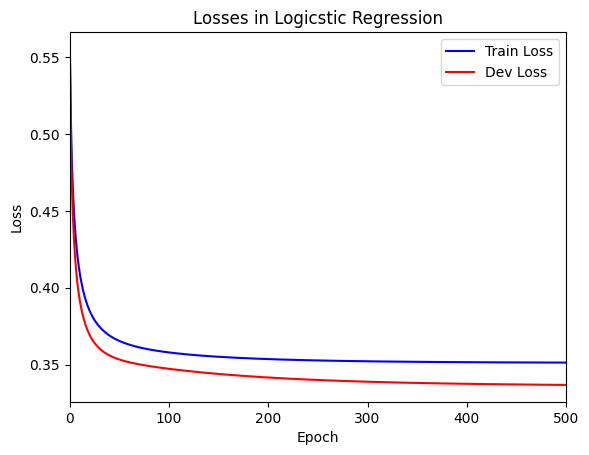

In [15]:
logistic_reg.fit(x_train,y_train,x_dev,y_dev)
#Đánh giá mô hình trên tập dev, test dựa trên loss

#Vẽ đồ thị loss

plt.plot(logistic_reg.losses, color="b", label = "Train Loss")
plt.plot(logistic_reg.losses_dev, color="r", label="Dev Loss")
plt.legend()
plt.title('Losses in Logicstic Regression')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim([0,500])
plt.show()


Loss của Train và Dev giảm nhanh ở các epoch và chậm lại dần tiệm cận ở một giá trị nhỏ. Mặc dù Dev Loss thấp hơn Train Loss nhưng không chênh lệch nhiều, thể hiện mô hình đang hoạt động khá ổn.  

In [16]:
y_pred = logistic_reg.predict(x_test)

import matplotlib.pyplot as plt

# Chuyển đổi xác suất thành nhãn nhị phân
y_pred_binary = (y_pred >= 0.5).astype(int)

test_accuracy = np.mean(y_pred_binary == y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8148984198645598


**Bài 2:** Sử dụng Numpy xây dựng phương pháp Softmax Regression và Gradient 
Descent. Tiến hành huấn luyện phương pháp Logistic Regression và trực quan hoá giá 
trị của hàm loss trong toàn bộ quá trình huấn luyện. 

In [17]:
class SoftmaxRegression:
    def __init__(self, epoch: int, learning_rate: float) -> None:
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.losses = []
        self.losses_dev = []
        self.metrics = []

    def softmax(self, z: np.ndarray) -> np.ndarray:
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Trừ max để tránh overflow
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return - (y * np.log(y_hat + 1e-6)).sum(axis=1).mean()
    
    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        y = np.argmax(y, axis=1)  # Lấy nhãn thực tế từ one-hot
        y_hat = np.argmax(y_hat, axis=1)  # Lấy nhãn dự đoán
        return (1 - np.abs(y-y_hat)).mean()

    def fit(self, X: np.ndarray, y: np.ndarray, X_dev: np.ndarray, y_dev: np.ndarray) -> None:
        
        n = X.shape[0]
        d = X.shape[1]
        k = y.shape[1]  # Số lớp (số cột của y)
        self.theta = np.zeros((d, k))
        with tqdm(range(self.epoch)) as pb:
            for e in pb:
                pb.set_description(f"Epoch {e + 1}")
                y_hat = self.predict(X)
                diff = y_hat - y
                gradient = 1/n * np.matmul(X.T, (y_hat - y))
                self.theta -= self.learning_rate * gradient
                loss = self.loss_fn(y, y_hat)
                acc = self.accuracy(y, y_hat)
                pb.set_postfix({
                    "loss": loss,
                    "acc": acc
                })

                # Tính loss trên tập dev
                y_hat_dev = self.predict(X_dev)
                loss_dev = self.loss_fn(y_dev, y_hat_dev)
                self.losses_dev.append(loss_dev)

                self.losses.append(loss)
                self.metrics.append(acc)


    def predict(self, X: np.ndarray) -> np.ndarray:
        z = np.matmul(X, self.theta)
        y_hat = self.softmax(z)
        return y_hat

In [18]:
def encode_target_soft(value):
    if value == "Enrolled":
        return np.array([1, 0, 0])
    if value == "Dropout":
        return np.array([0, 1, 0])
    
    return np.array([0, 0, 1])
    

In [19]:
data2 = df.copy()
data2["Target"] = data2["Target"].apply(encode_target_soft)
data2

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,"[0, 1, 0]"
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,"[0, 0, 1]"
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,"[0, 1, 0]"
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,"[0, 0, 1]"
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,"[0, 0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,"[0, 0, 1]"
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,"[0, 1, 0]"
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,"[0, 1, 0]"
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,"[0, 0, 1]"


In [20]:
softmax_reg = SoftmaxRegression(500, 0.5)

Y = np.vstack(data2["Target"].to_numpy())

#Chia tập dữ liệu thành train, dev và test 0.8 train, 0.1 dev, 0.1 test
N = data.shape[0]
x_train_soft, x_temp_soft = np.split(x, indices_or_sections=[int(0.8*N)])
x_dev_soft, x_test_soft = np.split(x_temp_soft, indices_or_sections=[int(0.5*x_temp.shape[0])])

y_train_soft, y_temp_soft = np.split(Y, indices_or_sections=[int(0.8*N)])
y_dev_soft, y_test_soft = np.split(y_temp_soft, indices_or_sections=[int(0.5*y_temp.shape[0])])

Epoch 500: 100%|██████████| 500/500 [00:01<00:00, 322.23it/s, loss=0.554, acc=0.678]


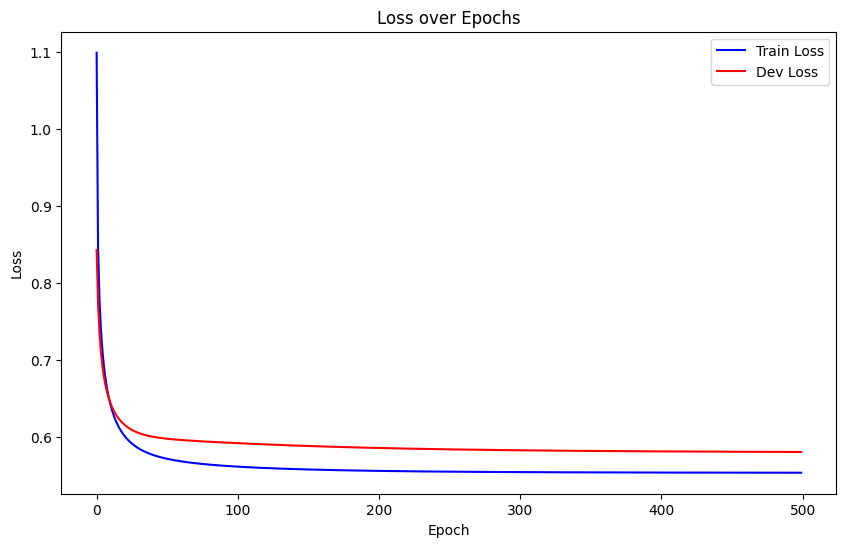

In [21]:
softmax_reg.fit(x_train_soft, y_train_soft, x_dev_soft, y_dev_soft)
#  Vẽ đồ thị loss
plt.figure(figsize=(10, 6))
plt.plot(softmax_reg.losses, label="Train Loss", color="b")
plt.plot(softmax_reg.losses_dev, label="Dev Loss", color="r")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [22]:
# Dự đoán trên tập test
y_pred_test = softmax_reg.predict(x_test_soft)
y_pred_test_labels = np.argmax(y_pred_test, axis=1)  # Lấy nhãn dự đoán
y_test_labels = np.argmax(y_test_soft, axis=1)  # Lấy nhãn thực tế

# Tính accuracy trên tập test
test_accuracy = np.mean(y_pred_test_labels == y_test_labels)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.744920993227991


**Bài 3:** Sử dụng các thư viện Machine Learning (Sklearn hoặc Skorch) thực thi lại 02 
phương pháp Logistic Regression và Softmax Regression. 

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Logistic Regression
logistic_model = LogisticRegression(max_iter=500, solver='lbfgs') #epoch=500, chọn learning_rate phù hợp

# Huấn luyện mô hình trên tập train
logistic_model.fit(x_train, y_train)  

# Dự đoán trên tập test
y_pred_test = logistic_model.predict(x_test)

# Tính độ chính xác trên tập test
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Logistic Regression Test Accuracy:", test_accuracy)

Logistic Regression Test Accuracy: 0.835214446952596


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# Khởi tạo mô hình Softmax Regression
softmax_model = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial')

# Huấn luyện mô hình trên tập train
softmax_model.fit(x_train_soft, y_train_soft.argmax(axis=1))  # y_train_soft cần chuyển từ one-hot về nhãn

# Dự đoán trên tập test
y_pred_test_softmax = softmax_model.predict(x_test_soft)

# Tính độ chính xác trên tập test
test_accuracy_softmax = accuracy_score(y_test_soft.argmax(axis=1), y_pred_test_softmax)
print("Softmax Regression Test Accuracy:", test_accuracy_softmax)

Softmax Regression Test Accuracy: 0.7471783295711061


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
